<a href="https://colab.research.google.com/github/jaikji96/python-projects/blob/master/MNIST_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
single_image = X_train[0]

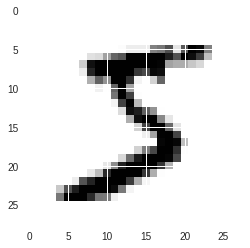

In [0]:
plt.imshow(single_image,cmap='gray_r')

In [0]:
y_train #labelled data that the above image is 5

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
X_train=X_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [0]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
from keras import Sequential

In [0]:
model = Sequential()

#CNN
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#to convert 2d-->1d
model.add(Flatten())

#dense Layer

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
#one hot encoding 

# change our data set into the categorical features
from keras.utils.np_utils import to_categorical

In [0]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [0]:
X_train = X_train / X_train.max()

In [0]:
x_test = x_test / x_test.max()

In [0]:
scaled_image = X_train[0]

In [0]:
scaled_image.max()

1.0

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
model.fit(X_train,y_cat_train,epochs=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 50s 835us/step - loss: 0.1363 - acc: 0.9589
Epoch 2/2
60000/60000 [==============================] - 49s 825us/step - loss: 0.0493 - acc: 0.9849


In [0]:
model.metrics_names

['loss', 'acc']

In [0]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 252us/step


[0.04887986026988074, 0.9844]

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(x_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.96      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.96      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

